In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [8]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [9]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf2,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

a=1
xer = (a)/(2 * np.sqrt(3))

u_val1 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer)**2)
u_val2 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer + xer)**2 )

u_ges = np.sqrt( (u_val1)**2 + (u_val2)**2 )
print(len(u_ges))

101


c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[13.33333333  0.96666667]


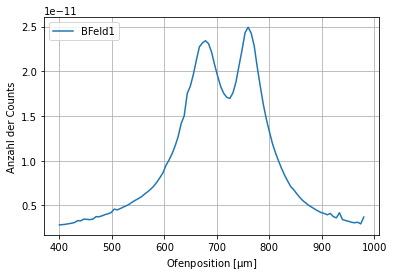

In [10]:
xcalib = [(400,1000),(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(400,985),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m,b,x):
    return m*x+b

for  i in range(len(xcalib)-10):
    popt,cov = curve_fit(linear,xcalib[i],ycalib[i])
    print(popt)
    plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="BFeld"+str(i+1))
    plt.xlabel(r"Ofenposition [$\mathrm{\mu m}$]")
    plt.ylabel(r"Anzahl der Counts")
    plt.legend(loc=2)
    plt.grid(True)

In [59]:
def doublegaussian(x,x0,mu1,mu2,sigma,c,y0): 
    return y0 + 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x+x0)-mu1)**2/(2*sigma**2)) + ((1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x+x0)-mu2)**2/(2*sigma**2))+c))

In [60]:
def fitdoublegaussian(array,x0,mu1,mu2,sigma,c,y0,d1,d2):
    x = array[d1:d2,0]
    y = array[d1:d2,1]
    popt1,pcov1 = curve_fit(doublegaussian,x,y,p0=[x0,mu1,mu2,sigma,c,y0])
    print(popt1)
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,doublegaussian(x,*popt1),label="fit")
    plt.legend(loc=0)
    plt.savefig("doublegauß.png")

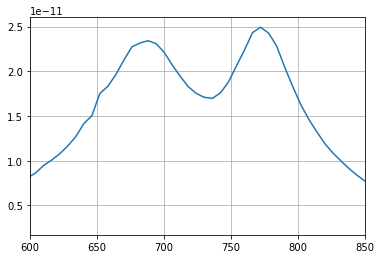

In [61]:
plt.plot(bf1[:,0],bf1[:,1])
plt.xlim(600,850)
plt.grid(True)
#plt.plot(np.arange(0,bf1[:,0]),bf1[:,1])

c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  730.            45.           -40.            60.
  6638.62393989 -6638.62393989]


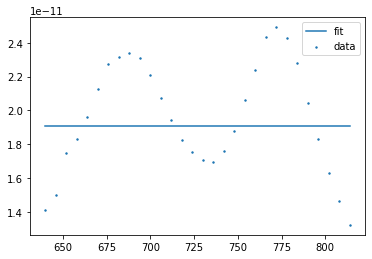

In [62]:
fitdoublegaussian(bf1,730,45,-40,60,0.1,1.4,40,70)

In [58]:
print(bf1)

[[4.00000000e+02 2.82800000e-12            nan]
 [4.06000200e+02 2.86000000e-12            nan]
 [4.12000400e+02 2.89800000e-12            nan]
 [4.18000600e+02 2.96000000e-12            nan]
 [4.24000800e+02 3.01700000e-12            nan]
 [4.30001000e+02 3.10400000e-12            nan]
 [4.36001200e+02 3.30800000e-12            nan]
 [4.42001399e+02 3.28300000e-12            nan]
 [4.48001599e+02 3.48000000e-12            nan]
 [4.54001799e+02 3.45000000e-12            nan]
 [4.60001999e+02 3.42000000e-12            nan]
 [4.66002199e+02 3.47800000e-12            nan]
 [4.72002399e+02 3.74600000e-12            nan]
 [4.78002599e+02 3.73900000e-12            nan]
 [4.84002799e+02 3.84300000e-12            nan]
 [4.90002999e+02 3.97800000e-12            nan]
 [4.96003199e+02 4.07300000e-12            nan]
 [5.02003399e+02 4.21300000e-12            nan]
 [5.08003599e+02 4.59200000e-12            nan]
 [5.14003798e+02 4.51100000e-12            nan]
 [5.20003998e+02 4.65100000e-12         